# Setting Up

In [1]:
%pip install django djlint numpy pandas matplotlib==3.7.3 seaborn jupyter nltk scikit-learn imblearn joblib nlppreprocess contractions

You should consider upgrading via the 'c:\Training\Project\django-ml-proj-nlp\senti-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [81]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import contractions
from nlppreprocess import NLP

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import NearMiss

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, balanced_accuracy_score, precision_score, recall_score, confusion_matrix, multilabel_confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [59]:
# Read txt
df2016_train = pd.read_csv('datasets/twitter-2016train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_devtest = pd.read_csv('datasets/twitter-2016devtest-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_dev = pd.read_csv('datasets/twitter-2016dev-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2016_test = pd.read_csv('datasets/twitter-2013test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2015_train = pd.read_csv('datasets/twitter-2015train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2015_test = pd.read_csv('datasets/twitter-2015test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2014_sarcasm = pd.read_csv('datasets/twitter-2014sarcasm-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2014_test = pd.read_csv('datasets/twitter-2014test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

df2013_train = pd.read_csv('datasets/twitter-2013train-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2013_dev = pd.read_csv('datasets/twitter-2013dev-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])
df2013_test = pd.read_csv('datasets/twitter-2013test-A.txt', sep='\t', header=None, names=['id', 'sentiment', 'text'])

# Decode unicode characters (if any)
df2016_train['text'] = df2016_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
#df2016_devtest['text'] = df2016_devtest['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2016_dev['text'] = df2016_dev['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2015_train['text'] = df2015_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2015_test['text'] = df2015_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2014_sarcasm['text'] = df2014_sarcasm['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2014_test['text'] = df2014_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

df2013_train['text'] = df2013_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2013_dev['text'] = df2013_dev['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
df2013_test['text'] = df2013_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))

# Concat
#df = pd.concat([df2016_train, df2016_dev, df2016_test, df2016_devtest, df2015_train, df2015_test, df2014_sarcasm, df2014_test, df2013_train, df2013_dev, df2013_test], ignore_index=True, axis=0)
df = pd.concat([df2016_train, df2016_dev, df2016_test, df2016_devtest, df2015_train, df2015_test, df2014_test, df2013_train, df2013_dev, df2013_test], ignore_index=True, axis=0)
#df = pd.concat([df2016_train, df2016_dev, df2015_train, df2013_train, df2013_dev], ignore_index=True, axis=0)

# Drop id column
df.drop(columns=['id'], inplace=True)

df

C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\2525603754.py:18: DeprecationWarning: invalid escape sequence '\m'
  df2016_train['text'] = df2016_train['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\2525603754.py:21: DeprecationWarning: invalid escape sequence '\ '
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\2525603754.py:21: DeprecationWarning: invalid escape sequence '\i'
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\2525603754.py:21: DeprecationWarning: invalid escape sequence '\('
  df2016_test['text'] = df2016_test['text'].apply(lambda x: x.encode("utf-8").decode("unicode-escape"))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19932\2525603754.py:21: DeprecationWarning: invalid escape sequence '\

,sentiment,text
0,negative,dear @Microsoft the newOoffice for Mac is grea...
1,negative,@Microsoft how about you make a system that do...
2,negative,I may be ignorant on this issue but... should ...
3,negative,"Thanks to @microsoft, I just may be switching ..."
4,neutral,If I make a game as a #windows10 Universal App...
...,...,...
32993,negative,Khaleda Zia's present India visit may have a b...
32994,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
32995,negative,@__Aniko you think mr.Calle let practice with ...
32996,positive,Don't hide under your desk! It's just a salsa ...


# Preprocessing

In [60]:
# show value_counts for targets for entire dataset
df['sentiment'].value_counts()

sentiment
positive    14195
neutral     13688
negative     5115
Name: count, dtype: int64

In [61]:
# show value_counts for targets for duplicate rows
duplicates = df[df.duplicated()]
duplicates['sentiment'].value_counts()

sentiment
neutral     1811
positive    1686
negative     636
Name: count, dtype: int64

In [62]:
# drop duplicates
print("Num of duplicates before drop: ", df.duplicated().sum())
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print("Num of duplicates after drop: ", df.duplicated().sum())
print("Rows after drop: ", df.shape[0], "\n")
print(df['sentiment'].value_counts())

Num of duplicates before drop:  4133
Num of duplicates after drop:  0
Rows after drop:  28865 

sentiment
positive    12509
neutral     11877
negative     4479
Name: count, dtype: int64


In [63]:
def preprocess_text(text):
    to_lower = text.lower() # make text lowercase
    no_link = re.sub('http[^\s]+', '', to_lower) # remove links (starts with http)
    no_contractions = contractions.fix(no_link) # remove contractions by expanding them
    no_punctuations = re.sub('\W+', ' ', no_contractions) # remove punctuations
    no_num = re.sub(r'\b\d+\b', ' ', no_punctuations) # remove numbers unless connected to words
    no_time = re.sub(r'\b([a-zA-Z0-9]+)(?:am|pm)\b', '', no_num) # remove time (e.g. 10pm)
    no_space = re.sub('\s+', ' ', no_time) # remove extra spaces
    
    # remove stopwords and lemmatize for NLP
    nlp = NLP(
        replace_words=True,             # replaces contractions
        remove_stopwords=True,          # removes select stopwords
        remove_numbers=False,
        lemmatize=True,                 # for lemmatization
        lemmatize_method='wordnet'
    )
    after_nlp = nlp.process(no_space)

    return after_nlp

In [64]:
# apply function and store result in new column
df["processed"] = df["text"].apply(preprocess_text)

In [65]:
# view original text
df['text'][0]

"dear @Microsoft the newOoffice for Mac is great and all, but no Lync update? C'mon."

In [66]:
# view preprocessed text
df['processed'][0]

'dear microsoft newooffice mac great and but no lync update c mon'

In [67]:
# split df to features and targets
df_features = df["processed"]
df_target = df["sentiment"]

In [68]:
# view features
df_features.tail()

28860    web youtube improves upload process with optio...
28861    going change my tumblr theme hope can finish l...
28862    am jealous everyone justin bieber concert no w...
28863    jim harbaugh alex smith drive giant world seri...
28864    trending tim tebow now dating cave woman from ...
Name: processed, dtype: object

In [69]:
# view target
df_target.head()

0    negative
1    negative
2    negative
3    negative
4     neutral
Name: sentiment, dtype: object

# Basic Model

In [70]:
# split df to train and test
x_train, x_test, y_train, y_test = train_test_split(
    df_features, df_target, test_size=0.2, random_state=77
)

print(x_train.shape, x_test.shape)

(23092,) (5773,)


In [71]:
# vectorize the preprocessed text
vectorizer = TfidfVectorizer(   # TFIDF = checks how important a word is
    #max_features=2000,          # max_features = maximum number of preserved words
    min_df=20,                  # min_df = minimum times a word should appear to be saved, if not met do not keep
    max_df=0.5,                 # max_df = maximum times a word can appear to be saved, if exceeds do not keep, float for percentage
    #sublinear_tf=True           # sublinear_tf = used to help scale down the importance of terms that occur frequently
) 

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

vector_df = pd.DataFrame(x_train.toarray(), columns=vectorizer.get_feature_names_out())

vector_df.head()

,10th,11th,12th,13th,14th,15th,16th,17th,18th,19th,...,young,your,yours,yourself,youth,youtube,yr,zayn,zlatan,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.182571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# view balance of train set targets
print("Percentage:\n", y_train.value_counts().divide(y_train.shape[0], axis=0).multiply(100, axis=0).round(2))
print("\nCounts:\n", y_train.value_counts())
print("\nRows:", y_train.shape[0])

Percentage:
 sentiment
positive    43.55
neutral     40.97
negative    15.48
Name: count, dtype: float64

Counts:
 sentiment
positive    10056
neutral      9461
negative     3575
Name: count, dtype: int64

Rows: 23092


In [73]:
# undersampling
undersample = NearMiss(n_neighbors=5, version=3, sampling_strategy="not minority")

x_train, y_train = undersample.fit_resample(x_train, y_train)

print(y_train.value_counts())
print("\nRows:", y_train.shape[0])

sentiment
negative    3575
neutral     3575
positive    3575
Name: count, dtype: int64

Rows: 10725


In [74]:
# train model

model = SVC(random_state=77)   
# Time: 24.4s
# Accuracy: 0.6168760339183145
# Precision: 0.5888206622760634
# Recall: 0.6168760339183145
# F1 Score: 0.5886591282385856

# fit the model
model.fit(x_train, y_train)

# predict
predictions = model.predict(x_test)

# check metric scores
print("Accuracy:", balanced_accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average="macro"))
print("Recall:", recall_score(y_test, predictions, average="macro"))
print("F1 Score:", f1_score(y_test, predictions, average="macro"))

Accuracy: 0.6168760339183145
Precision: 0.5888206622760634
Recall: 0.6168760339183145
F1 Score: 0.5886591282385856


In [19]:
# other models tested

# create arrays for NB
#x_train_arr = x_train.toarray()
#x_test_arr = x_test.toarray()

#model = GaussianNB()
# Time: 1.4s
# Accuracy: 0.5066184808498903
# Precision: 0.4785084917412182
# Recall: 0.5066184808498903
# F1 Score: 0.454322337184524

#model = MultinomialNB()
# Time: 0.2s
# Accuracy: 0.5864277525291615
# Precision: 0.5507637892853133
# Recall: 0.5864277525291615
# F1 Score: 0.5541723322348201

#model = ComplementNB()
# Time: 0.2s
# Accuracy: 0.585931047560993
# Precision: 0.5487343486284044
# Recall: 0.585931047560993
# F1 Score: 0.5464215173271928

#model = LinearSVC(random_state=77, dual='auto')
# Time: 0.2s
# Accuracy: 0.5878883880617728
# Precision: 0.5543853034953427
# Recall: 0.5878883880617728
# F1 Score: 0.558027712496666

#model = SGDClassifier(random_state=77)
# Time: 0.2s
# Accuracy: 0.6032645593613468
# Precision: 0.5655203183438711
# Recall: 0.6032645593613468
# F1 Score: 0.5662745193149411

#model = DecisionTreeClassifier(random_state=77)
# Time: 6.5s
# Accuracy: 0.5065376283491018
# Precision: 0.48604546211620825
# Recall: 0.5065376283491018
# F1 Score: 0.48194254807408426

#model = RandomForestClassifier(random_state=77)
# Time: 29.9s
# Accuracy: 0.5972212278961054
# Precision: 0.5701129632860881
# Recall: 0.5972212278961054
# F1 Score: 0.5627530256256742

#model = LogisticRegression(random_state=77, max_iter=x_train.shape[0])
# Time: 0.5s
# Accuracy: 0.5975307916633606
# Precision: 0.5658800931573422
# Recall: 0.5975307916633606
# F1 Score: 0.5696850974274613

In [75]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

    negative       0.41      0.67      0.51       904
     neutral       0.61      0.62      0.61      2416
    positive       0.74      0.56      0.64      2453

    accuracy                           0.60      5773
   macro avg       0.59      0.62      0.59      5773
weighted avg       0.64      0.60      0.61      5773



In [76]:
# generate confusion matrix
labels = np.unique(predictions)
cm = confusion_matrix(y_test, predictions, labels=labels)
cm

array([[ 605,  211,   88],
       [ 531, 1497,  388],
       [ 323,  752, 1378]], dtype=int64)

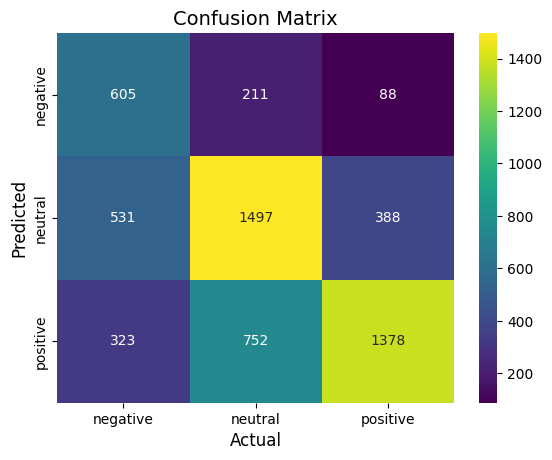

In [77]:
# show confusion matrix in a heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='viridis')

plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [78]:
# view balance of test set targets
print(y_test.value_counts())
print("\nRows:", y_test.shape[0])

sentiment
positive    2453
neutral     2416
negative     904
Name: count, dtype: int64

Rows: 5773


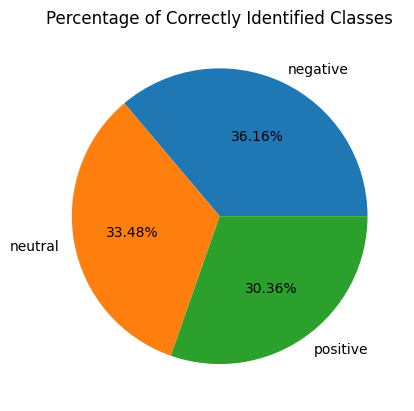

In [79]:
# calculate percentage of correctly identified sentiments
percent = cm.diagonal() / cm.sum(axis=1)

# show percentages in a pie chart
plt.pie(percent, labels=labels, autopct="%1.2f%%")
plt.title("Percentage of Correctly Identified Classes")
plt.show()

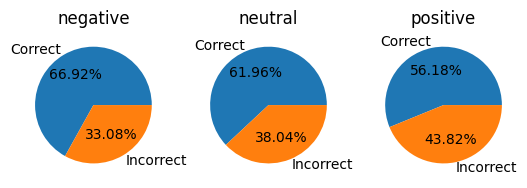

In [80]:
# calculate percentage of correctly identified sentiments per sentiment
percent_correct = [np.sum(cm[i, i]) / np.sum(cm[i, :]) for i in range(len(cm))]
percent_incorrect = [1 - percent_correct[i] for i in range(len(cm))]

# show percentages in pie charts
fig, axs = plt.subplots(1, len(cm))
for i in range(len(cm)):
    axs[i].pie([percent_correct[i], percent_incorrect[i]], labels=["Correct", "Incorrect"], autopct="%1.2f%%")
    axs[i].set_title(labels[i])
plt.show()

# Hyperparameter Tuning

In [131]:
# GridSearchCV

# provide parameter dictionary
parameters = {
    "C": [1, 2, 3, 4, 5],                               # regularization parameter, higher = more sensitive to misclassifications
    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
    "gamma": ["scale", 0.1, 1.0, 1.5],                  # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
    "degree": [3, 4, 5],                                # only important if poly
    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
    "break_ties": [True, False],                        # only important if ovr
}

# create blank model
model_tuner = SVC(random_state=77)

# perform grid search on f1_macro metric
model_tuner = GridSearchCV(
    model_tuner,
    parameters,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# fit the model
tune_results = model_tuner.fit(x_train, y_train)

# get the best hyperparameters
print("Best Params: ", tune_results.best_params_)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


c:\Training\Project\django-ml-proj-nlp\senti-env\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.54894239 0.51674612 0.5222686 ]
  warnings.warn(


Best Params:  {'C': 1, 'break_ties': True, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}


In [26]:
# Time: 134m 13.4s
# Best Params:  {'C': 1, 'coef0': 0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

# Parameter Grid: 
#    "C": [1, 5, 10],                                    # regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": ["scale", "auto", 0.0, 0.5],               # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": [3, 4, 5],                                # only important if poly
#    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"]           # one-vs-one or one-vs-rest

In [ ]:
# Time: 377m 59.4s
# Best Params: Best Params:  {'C': 1, 'break_ties': True, 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 4, 'gamma': 0.1, 'kernel': 'poly'}

# Parameter Grid:
#    "C": [1, 2, 3, 4, 5],                               # regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": ["scale", 0.1, 1.0, 1.5],                  # kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": [3, 4, 5],                                # only important if poly
#    "coef0": [0, 0.5, 1],                               # only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
#    "break_ties": [True, False],                        # only important if ovr

In [130]:
# RandomizedSearchCV

# provide parameter dictionary
parameters = {
    "C": np.arange(1, 11, 1),                           # (10) regularization parameter, higher = more sensitive to misclassifications
    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
    "gamma": np.arange(0.1, 1.1, 0.1),                  # (10) kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
    "degree": np.arange(3, 8, 1),                       # (5) only important if poly
    "coef0": np.linspace(0, 1, num=5),                  # (5) only important if poly/sigmoid
    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
    "break_ties": [True, False],                        # only important if ovr
}

# create blank model
model_tuner = SVC(random_state=77)

# perform grid search on f1_macro metric
model_tuner = RandomizedSearchCV(
    model_tuner,
    parameters,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    n_iter=1000,
    random_state=77
)

# fit the model
tune_results = model_tuner.fit(x_train, y_train)

# get the best hyperparameters
print("Best Params: ", tune_results.best_params_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


c:\Training\Project\django-ml-proj-nlp\senti-env\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.53344196 0.54251765 0.54434053 0.50745556        nan
        nan        nan 0.54625546        nan        nan 0.55232941
 0.54218155 0.52719049        nan 0.52651773 0.54916273        nan
 0.53352713 0.54294054 0.16659673 0.26564802 0.54284658        nan
 0.54404425 0.54012568 0.52918128 0.54565678 0.54422104 0.54401596
 0.16659673 0.50745556 0.54517865        nan        nan 0.53620069
        nan        nan 0.5062039  0.54460447 0.52365723 0.50745556
 0.53568974 0.55351534 0.51495454 0.55313875 0.5522039  0.52928141
 0.54457361 0.53566041 0.5479103  0.5543659  0.54073217 0.54460447
        nan 0.54265688 0.16659673 0.55222763        nan 0.52619901
 0.54754941        nan 0.55174864 0.53988029        nan        nan
 0.53057423 0.48462672 0.5179681  0.53742937        nan 0.54200257
        nan 0.55089035 0.5142

Best Params:  {'kernel': 'rbf', 'gamma': 0.4, 'degree': 4, 'decision_function_shape': 'ovr', 'coef0': 0.5, 'break_ties': True, 'C': 1}


In [ ]:
# Time: 158m 5.8s
# Best Params:  {'kernel': 'rbf', 'gamma': 0.4, 'degree': 4, 'decision_function_shape': 'ovr', 'coef0': 0.5, 'break_ties': True, 'C': 1}

# Parameter Grid:
#    "C": np.arange(1, 11, 1),                           # (10) regularization parameter, higher = more sensitive to misclassifications
#    "kernel": ["linear", "rbf", "poly", "sigmoid"],     # kernel type
#    "gamma": np.arange(0.1, 1.1, 0.1),                  # (10) kernel coefficient, only important if rbf/poly/sigmoid, higher = more sensitive to local variations in the data
#    "degree": np.arange(3, 8, 1),                       # (5) only important if poly
#    "coef0": np.linspace(0, 1, num=5),                  # (5) only important if poly/sigmoid
#    "decision_function_shape": ["ovo", "ovr"],          # one-vs-one or one-vs-rest
#    "break_ties": [True, False],                        # only important if ovr

In [144]:
# create new model with best hyperparameters
tuned_model = SVC(random_state=77,
    C=1, break_ties=True, coef0=1, decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly'
)

# fit the tuned model
tuned_model.fit(x_train, y_train)

# predict
predictions = tuned_model.predict(x_test)

# check metric scores
print("Accuracy:", balanced_accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions, average="macro"))
print("Recall:", recall_score(y_test, predictions, average="macro"))
print("F1 Score:", f1_score(y_test, predictions, average="macro"))

Accuracy: 0.6026666172944677
Precision: 0.5711275449862548
Recall: 0.6026666172944677
F1 Score: 0.5759425674457325


In [40]:
# SCORE TO BEAT:
# Accuracy: 0.6168760339183145
# Precision: 0.5888206622760634
# Recall: 0.6168760339183145
# F1 Score: 0.5886591282385856

# RESULTING SCORE:
# Params: C=1, decision_function_shape='ovr', gamma=1.0, kernel='rbf', break_ties=True
# Accuracy: 0.6170981112559558
# Precision: 0.5892973360580829
# Recall: 0.6170981112559558
# F1 Score: 0.5895409430184505

In [ ]:
# other results (did not beat basic model)

# Params: C=1, decision_function_shape='ovo', gamma=1.0, kernel='rbf'
# Accuracy: 0.6164642077002043
# Precision: 0.5883454805406348
# Recall: 0.6164642077002043
# F1 Score: 0.5881704237542235

# Params: C=1, decision_function_shape='ovr', gamma=0.4, kernel='rbf', break_ties=True
# Accuracy: 0.6123857625311352
# Precision: 0.5888240409908474
# Recall: 0.6123857625311352
# F1 Score: 0.5861508876945287

# Params: C=1, decision_function_shape='ovr', gamma=0.1, kernel='poly', break_ties=True, coef0=1, degree=4
# Accuracy: 0.613537132942747
# Precision: 0.589919764468161
# Recall: 0.613537132942747
# F1 Score: 0.5875047311673264

In [135]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

    negative       0.42      0.65      0.51       904
     neutral       0.60      0.64      0.62      2416
    positive       0.75      0.55      0.63      2453

    accuracy                           0.60      5773
   macro avg       0.59      0.61      0.59      5773
weighted avg       0.64      0.60      0.61      5773



In [136]:
# generate confusion matrix
labels = np.unique(predictions)
cm = confusion_matrix(y_test, predictions, labels=labels)
cm

array([[ 592,  231,   81],
       [ 510, 1543,  363],
       [ 312,  799, 1342]], dtype=int64)

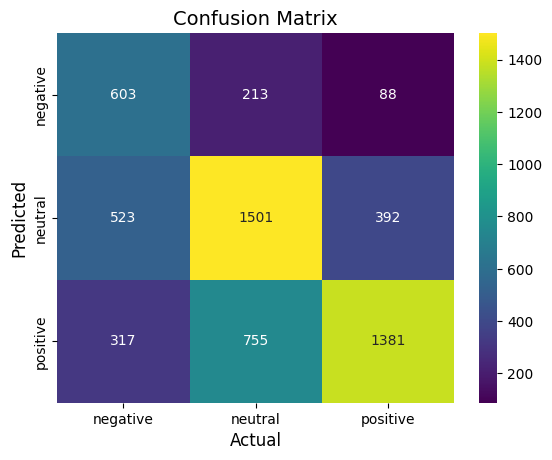

In [303]:
# show confusion matrix in a heatmap
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='viridis')

plt.ylabel('Predicted', fontsize=12)
plt.xlabel('Actual', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()